Prompt: Wie kann ich meine Steuerlast reduzieren?
Intent: Frage
   - Frage: 0.542
   - Befehl: 0.23
   - Zusammenfassung: 0.126
   - Ideengenerierung: 0.102
Domain: Finanzen
   - Finanzen: 0.523
   - Persönlich: 0.286
   - Technik: 0.142
   - Marketing: 0.05
Difficulty: medium
   - medium: 0.42
   - low: 0.349
   - high: 0.23

Prompt: Erstelle mir eine Zusammenfassung des letzten Quartals.
Intent: Zusammenfassung
   - Zusammenfassung: 0.955
   - Frage: 0.021
   - Befehl: 0.015
   - Ideengenerierung: 0.009
Domain: Technik
   - Technik: 0.321
   - Finanzen: 0.305
   - Persönlich: 0.232
   - Marketing: 0.141
Difficulty: low
   - low: 0.54
   - medium: 0.326
   - high: 0.135

Prompt: Was sind die Vorteile von KI im Marketing?
Intent: Frage
   - Frage: 0.526
   - Ideengenerierung: 0.266
   - Zusammenfassung: 0.122
   - Befehl: 0.086
Domain: Marketing
   - Marketing: 0.825
   - Technik: 0.102
   - Persönlich: 0.041
   - Finanzen: 0.032
Difficulty: medium
   - medium: 0.478
   - high: 0.325
 

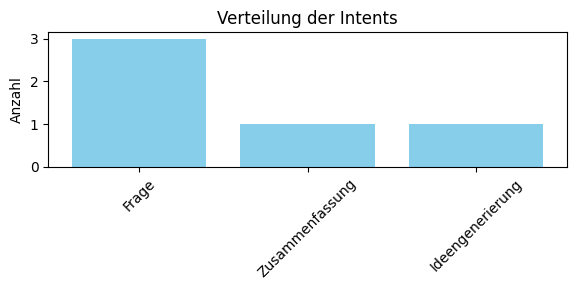

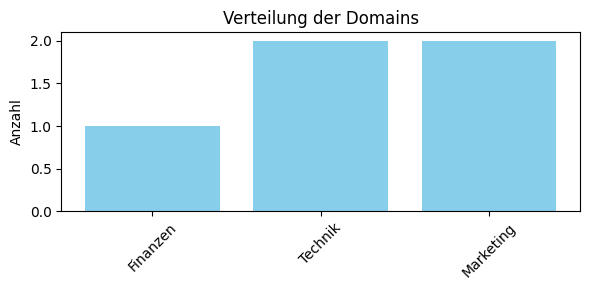

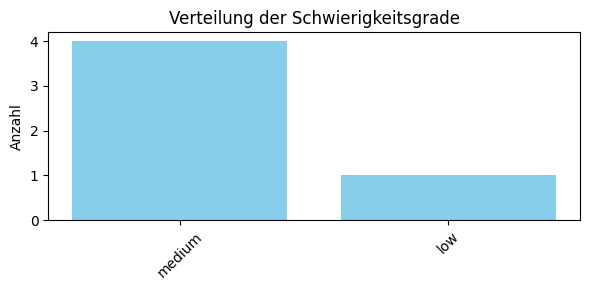

In [7]:
import sys
import os
import matplotlib.pyplot as plt
from collections import Counter

sys.path.append(os.path.abspath(".."))

from src.classifier import classify_prompt

# Korrigierter Pfad zur Datei
with open("../data/example_prompts.txt") as f:
    prompts = [line.strip() for line in f if line.strip()]

# Prompts klassifizieren
for prompt in prompts:
    result = classify_prompt(prompt)
    print("Prompt:", result["prompt"])
    for category, data in result["result"].items():
        print(f"{category.capitalize()}: {data['label']}")
        for label, score in data["scores"].items():
            print(f"   - {label}: {round(score, 3)}")
    print()  # Leerzeile für bessere Lesbarkeit

# Ergebnisse sammeln
intent_counter = Counter()
domain_counter = Counter()
difficulty_counter = Counter()

for prompt in prompts:
    result = classify_prompt(prompt)
    intent_counter[result["result"]["intent"]["label"]] += 1
    domain_counter[result["result"]["domain"]["label"]] += 1
    difficulty_counter[result["result"]["difficulty"]["label"]] += 1

# Plot-Funktion
def plot_counter(counter, title):
    labels, values = zip(*counter.items())
    plt.figure(figsize=(6, 3))
    plt.bar(labels, values, color='skyblue')
    plt.title(title)
    plt.ylabel("Anzahl")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualisieren
plot_counter(intent_counter, "Verteilung der Intents")
plot_counter(domain_counter, "Verteilung der Domains")
plot_counter(difficulty_counter, "Verteilung der Schwierigkeitsgrade")
